## Machine Learning and Artificial Intelligence 
Summer High School Academic Program for Engineers (2025)
## Introduction to Neural Networks 


## Limitations of Linear Models 

Linear models can only learn linearly separable data. Most of the data sets we discovered are not linearly separable. 

Historically, one big argument against linear models was that they can never become complete models of computation because they cannot model boolean functions. Specifically, consider the following example: 


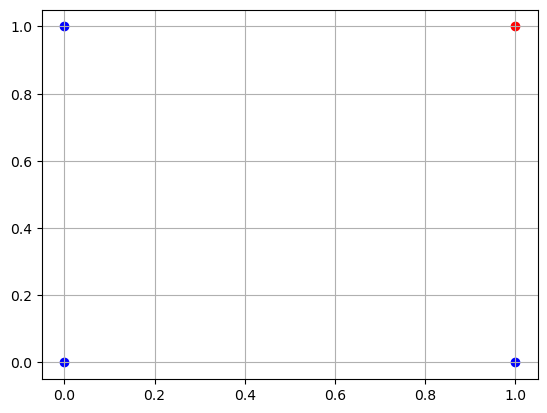

In [19]:
import numpy as np

input_data = np.array([[0,0],[0,1],[1,0],[1,1]])

and_test = np.array([0,0,0,1])

or_test = np.array([0,1,1,1])

xor_test = np.array([0,1,1,0])

from matplotlib import pyplot as plt

def plot_data(input_data, classes): 
    posdata = np.array([input_data[i] for i in range(len(input_data)) if classes[i] == 1])
    negdata = np.array([input_data[i] for i in range(len(input_data)) if classes[i] == 0])
    plt.grid()
    plt.scatter(posdata[:,0], posdata[:,1], color='red')
    plt.scatter(negdata[:,0], negdata[:,1], color='blue')

plot_data(input_data, and_test)

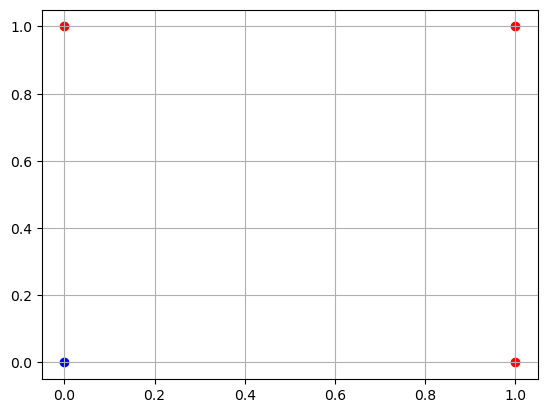

In [21]:
plot_data(input_data, or_test)

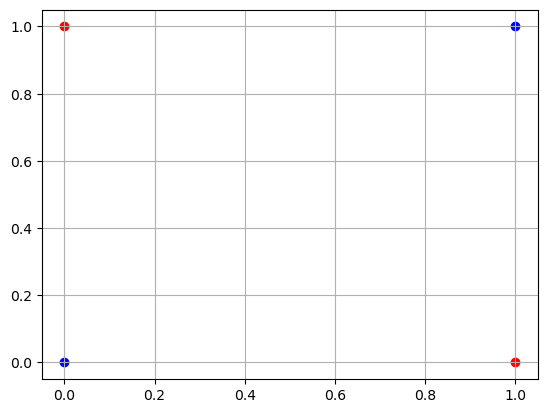

In [23]:
plot_data(input_data, xor_test)

Clearly, while `and` and `or` are separable and can be learned by a linear model, the `xor` function is not. 

## Neural Networks 

<img src="https://www.cs.columbia.edu/~bauer/shape/basic_multilayer_nn.png" width=500px>

To overcome the limitations of linear models, we combine two ideas: 

* We can apply multiple neurons / units simultaneously on the same input, and then combine the results.
* The composition of a number of linear functions is still a linear function. We replace the activation function. Instead of the step function, we use a "smooth soft-threshold" function, such as the sigmoid function. We will discuss the sigmoid function and various other non-linear activation functions later. 

The basic idea is then that we can approximate any function as a combination of multiple soft-threshold functions. One hidden layer suffices to approximate any function with arbitrary precision (provided enough units), even discontinuous functions! (Hornik, Stinchcombe, and White (1989)).

In practice, neural networks often have many hidden layers of various sizes, one after the other. Note that the input layer is just the input vector presented to the neural network. The output layer may consist of a single unit (e.g. in binary classification or regression) or of multiple units (e.g. if there is more than two output classes, such as in hand-written digit recognition). 

With non-linear activation functions we can no longer use the perceptron algorithm to learn (and it would be unclear how to do this across multiple layers anyway). Instead, we will have to use gradient-based optimization techniques, specifically backpropagation.

### Pre-activation Matrix Multiplication

Each unit at each hidden layer has its own weight vector. If we stack the weight vectors for all units in the hidden layer together, we get a matrix. 

Specifically, if there are $d$ inputs and $e$ hidden units, we can store all the weights for the first hidden layer in a $e \times d$ matrix (one weight vector per row).  Let's call this matrix $\mathbf{W}$. The input vector $\mathbf{x}$ is a column vector (i.e. a $(d \times 1)$ matrix). 

The **pre-activation** at the first hidden layer is

$\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$

$\mathbf{z}$ is a $(e \times 1)$ column vector, where each row represent the pre-activation (weighted sum) at one of the hidden units. 
$\mathbf{b}$ is the vector of the bias terms for the units in the hidden layer, and is also $(e \times 1)$.


$\mathbf{z} =  \begin{bmatrix} z_1 \\ \vdots \\z_e \end{bmatrix} =  \begin{bmatrix} W_{1,1}& W_{1,2} & \cdots & W_{1,d}\\ \ddots \\ W_{e,1}& W_{e,2} & \cdots &W_{e,d} \end{bmatrix}  \begin{bmatrix} x_1\\ x_2 \\ \vdots \\x_d \end{bmatrix}  + \begin{bmatrix} b_1 \\ \vdots \\b_e \end{bmatrix} $  

$=   \begin{bmatrix} W_{1,1} x_{1} + W_{1,2} x_2 + \ldots +  W_{1,d} x_d\\ \ddots \\
W_{e,1} x_{1} + W_{e,2} x_2 + \ldots +  W_{e,d} x_d\end{bmatrix} + \begin{bmatrix} b_1 \\ \vdots \\b_e \end{bmatrix}$ 




### Activation Functions

Once the preactivation is computed, we apply the activation function $f(\mathbf{z}) = f(\mathbf{W}\mathbf{x} + \mathbf{b})$. 

The most common activation function is the **sigmoid**: $\sigma(z) =  \frac{1}{1+e^{-z}}$. 

$e$ is the base of the natural logarithm, which is approximately 2.71828. 

The output range of the sigmoid function is between 0 and 1. It approaches 0 as $z$ goes towards $-\inf$ and 1 as $z$ goes towards $\inf$. 
Also, $\sigma(0) = 0.5$

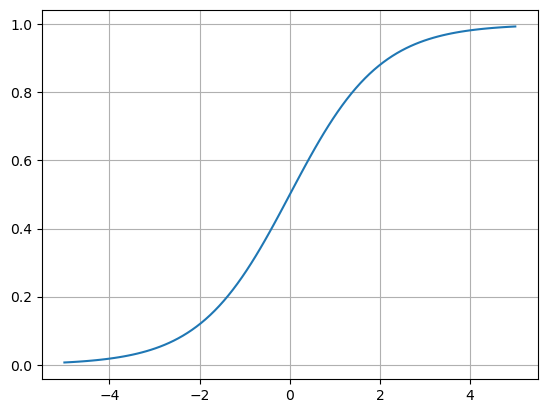

In [162]:
import math 
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

xvals = np.linspace(-5,5,100)
yvals = sigmoid(xvals)
plt.grid()
plt.plot(xvals, yvals)


In [138]:
sigmoid(0)

0.5

The activation function is applied element-wise. 


$f(\mathbf{z}) = \begin{bmatrix} f(z_1) \\f(z_2) \\\vdots \\ f(z_d) \end{bmatrix}$

The sigmoid function is useful because on a binary classification problem it can be interpreted as the *probability* for the output to be class 1 (as opposed to be class -1).   (We won't go into details why this is the case)

Another common activation function is the **hyperbolic tangent** 

$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$.



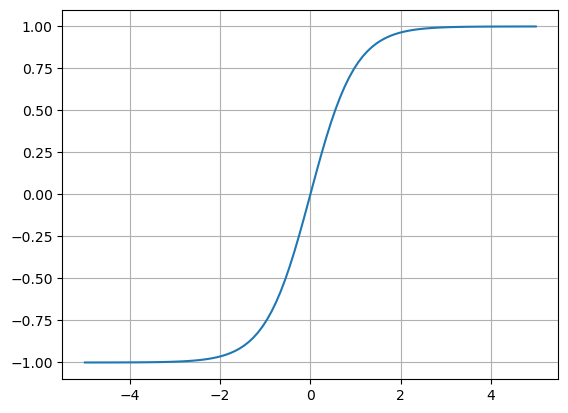

In [180]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

xvals = np.linspace(-5,5,100)
yvals = tanh(xvals)
plt.grid()
plt.plot(xvals, yvals)

The output range of the tanh function is between -1 and 1 (similar to the step function in the perceptron).
It approaches -1 as $z$ goes towards $-\infty$ and 1 as $z$ goes towards $\infty$.  $tanh(0) = 0$, which means the function is *0-centered*. This is a useful property in neural networks. 

A third useful activation function is the **rectifier linear function** (rectifier linear unit)

$
\text{ReLU}(x) =
\begin{cases}
0 & \text{if } x < 0 \\
x & \text{if } x \geq 0
\end{cases}$

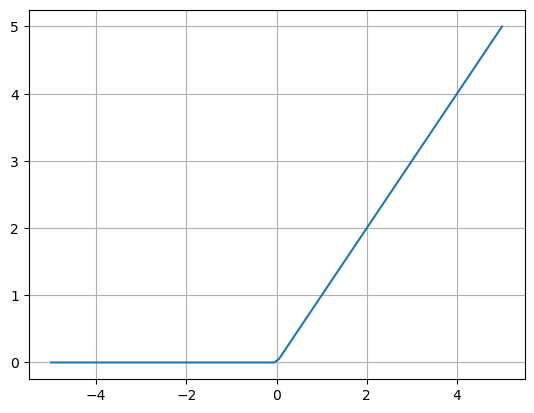

In [192]:
def relu(z):
    return np.where(z < 0, 0, z)

xvals = np.linspace(-5,5,100)
yvals = relu(xvals)
plt.grid()
plt.plot(xvals, yvals)

### The Output Layer

We typically use multi-layer neural networks for binary classification or multi-class classification. 

In the binary classification case, the output is typically a single sigmoid activated unit. The activation at the output is then interpreted as the probability $P(\text{class} = 1 | \mathbf{x})$ and $P(\text{class} = -1 | \mathbf{x}) = 1 - P(\text{class} = 1 | \mathbf{x})$.


In the multi-class classification case, we have multiple output units. We can select the class corresponding to the unit with maximum activation. 

Sometimes, we want the output to be a probability distribution over classes, like in the binary case. To do this, we can use the **softmax** function (which turns out to be a generalization of the sigmoid). 

For each component of the output vector $\mathbf{z}$ (a $(d \times 1)$ vector):
$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{d} e^{z_j}}$$

For example, if the output vector was 

$\mathbf{z} = \begin{bmatrix}0.9\\0.1\\0.7\\0.4\end{bmatrix}$, then $\text{softmax}(\mathbf{z}) = \begin{bmatrix}0.35\\0.16\\0.28\\0.21 \end{bmatrix}$